# Praktikum 1
# Deskripsi

Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.

Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.


# Langkah 1 - Import Library

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Langkah 2 - Load Data dan Visualisasi

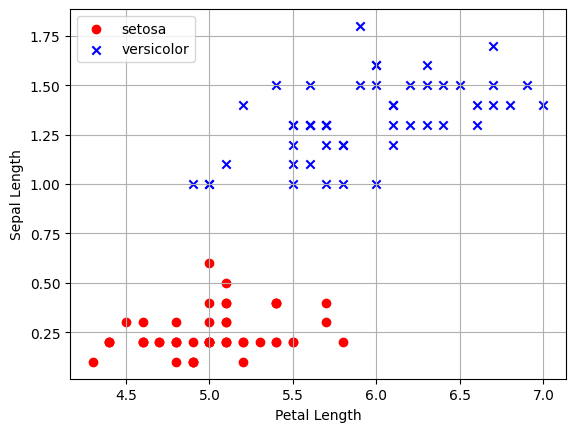

In [105]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Week 8/iris.csv')
# Pisahkan data berdasarkan spesies
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']

# Ubah indeks kolom agar sesuai (SepalLengthCm adalah kolom 'SepalLengthCm', PetalLengthCm adalah kolom 'PetalLengthCm')
a, b = 'SepalLengthCm', 'PetalWidthCm'  # Sepal Length vs Petal Width

# Plot data setosa dan versicolor
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

# Tambahkan label dan grid
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()


# Langkah 3 - Membuat Kelas Perceptron

In [106]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Langkah 4 - Pilih Data dan Encoding Label

In [107]:
y = df.iloc[0:100, 5].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [1, 4]].values # slice data latih

# Langkah 5 - Fitting Model

In [108]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Langkah 6 - Visualisasi Nilai Error Per Epoch

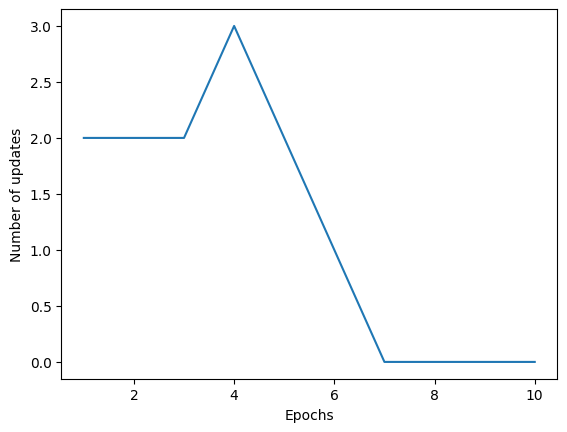

In [109]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# Langkah 7 - Visualiasasi Decision Boundary

<ipython-input-110-2b67395fb9a8>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


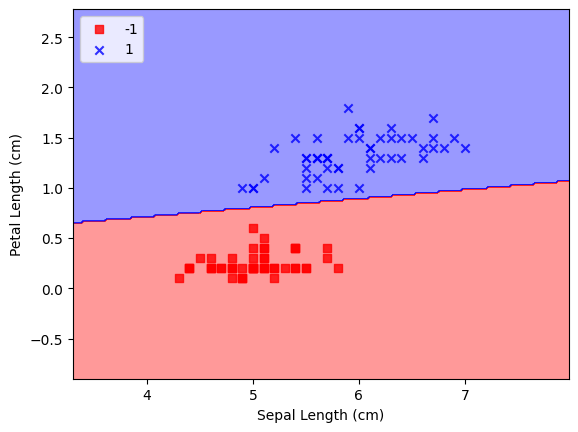

In [110]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # buat grid dari nilai minimum dan maksimum untuk dua fitur
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Kolom pertama (Sepal Width)
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Kolom kedua (Petal Width)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # prediksi untuk setiap titik pada grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Plot contour dan decision boundary
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data sample
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

    # Tambahkan label untuk fitur yang digunakan
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Petal Length (cm)')
    plt.legend(loc='upper left')
    plt.show()

# Panggil fungsi plot decision regions
plot_decision_regions(X, y, classifier=ppn)
